In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import norm

In [3]:
# TTE    BNP      MC.PA

In [4]:
df = pd.read_csv("MC.PA.csv")

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-27,683.299988,692.700012,682.299988,690.200012,679.456604,249850.0
1,2022-12-28,692.299988,694.700012,685.799988,686.599976,675.912659,196630.0
2,2022-12-29,684.700012,699.000000,682.200012,696.500000,685.658569,198655.0
3,2022-12-30,696.599976,696.599976,676.599976,679.900024,669.316956,272368.0
4,2023-01-02,689.400024,695.000000,685.099976,694.099976,683.295837,194703.0


### Outliers

In [6]:
def find_outliers_iqr(data, column_name):
    # Calculate quartiles and IQR for the specified column
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    
    return outliers

In [7]:
find_outliers_iqr(df , "Open")

,Date,Open,High,Low,Close,Adj Close,Volume


In [8]:
find_outliers_iqr(df , "High")

,Date,Open,High,Low,Close,Adj Close,Volume


In [9]:
find_outliers_iqr(df , "Low")

,Date,Open,High,Low,Close,Adj Close,Volume


In [10]:
find_outliers_iqr(df , "Close")

,Date,Open,High,Low,Close,Adj Close,Volume


In [11]:
find_outliers_iqr(df , "Adj Close")

,Date,Open,High,Low,Close,Adj Close,Volume


In [12]:
find_outliers_iqr(df , "Volume")

,Date,Open,High,Low,Close,Adj Close,Volume
43,2023-02-24,811.400024,812.700012,777.299988,777.299988,765.200806,839007.0
54,2023-03-13,803.700012,805.799988,775.500000,781.700012,769.532349,656071.0
56,2023-03-15,797.599976,800.400024,767.599976,774.700012,762.641357,658997.0
57,2023-03-16,785.299988,809.299988,776.700012,801.700012,789.221069,600374.0
58,2023-03-17,805.000000,808.000000,784.500000,787.299988,775.045166,932225.0
108,2023-05-31,818.299988,828.500000,807.599976,813.900024,807.497742,859625.0
120,2023-06-16,848.500000,872.400024,845.500000,868.599976,861.767456,1017309.0
148,2023-07-26,821.000000,826.400024,804.500000,810.000000,803.628418,751898.0
178,2023-09-06,757.299988,757.500000,723.599976,731.500000,725.745911,699773.0
185,2023-09-15,759.400024,772.400024,757.400024,761.200012,755.212280,1180906.0


In [13]:
def create_boxplot_with_outliers(data, column_name):
    # Finding outliers in the specified column
    outliers = find_outliers_iqr(data, column_name)

    # Creating a boxplot to visualize the specified column and its outliers
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column_name])
    plt.title(f'Boxplot of "{column_name}" Column with Outliers')
    plt.ylabel('Values')
    plt.xlabel(column_name)
    plt.grid(True)

    # Highlighting outliers on the boxplot
    if not outliers.empty:
        plt.scatter(outliers.index + 1, outliers[column_name], color='red', label='Outliers')
        plt.legend()

    plt.show()

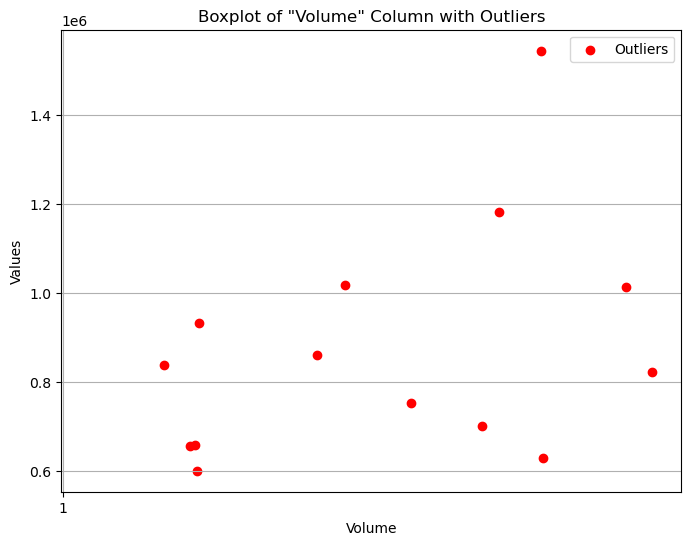

In [14]:
create_boxplot_with_outliers(df , "Volume")

## Missing Values

In [15]:
rows_with_na = df[df.isna().any(axis=1)]

print("Rows with empty or NA cells:")
print(rows_with_na)

Rows with empty or NA cells:
           Date  Open  High  Low  Close  Adj Close  Volume
109  2023-06-01   NaN   NaN  NaN    NaN        NaN     NaN
156  2023-08-07   NaN   NaN  NaN    NaN        NaN     NaN


# Exploratory Data Analysis

In [16]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,786.608267,794.562991,779.010630,787.028346,779.157878,3.635752e+05
std,64.516882,64.440245,64.310422,64.321832,63.033885,1.622619e+05
min,660.599976,669.799988,655.000000,660.599976,655.403625,1.098630e+05
25%,726.774994,737.925018,720.749985,731.699997,725.937576,2.732502e+05
50%,802.100006,809.649994,791.550018,801.800018,789.762482,3.238365e+05
75%,837.774994,845.150009,827.650024,836.449982,828.382157,4.040958e+05
max,894.500000,904.599976,891.599976,902.000000,887.959778,1.544205e+06


In [89]:
def visualize_histogram(data, column_name):
    plt.figure(figsize=(6, 4))
    plt.hist(data[column_name])
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of "{column_name}" Column')
    plt.tight_layout()
    plt.show()

    
def visualize_boxplot(data, column_name):
    plt.figure(figsize=(6, 8))
    plt.boxplot(data[column_name])
    plt.title(f'Boxplot of "{column_name}" Column')
    plt.ylabel('Values')
    plt.xlabel(column_name)
    plt.show()
    
    
def visualize_time_series(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    plt.plot(data[x_column], data[y_column])
    plt.title(f'{y_column} over {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

def visualize_column_correlation(data, column_name):
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    numeric_columns = numeric_columns.drop(column_name)
    correlations = data[numeric_columns].corrwith(data[column_name])
    corr_df = pd.DataFrame({'Correlation': correlations})
    corr_df = corr_df.sort_values(by='Correlation', ascending=False)
    
    cmap = np.random.choice(plt.colormaps())
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(data[corr_df.index].corr(), annot=True, cmap=cmap, fmt='.2f')
    plt.title(f'Correlation Heatmap of {column_name} with Numeric Columns')
    plt.show()

In [90]:
# Open

In [91]:
df["Open"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 256 entries, 0 to 255
Series name: Open
Non-Null Count  Dtype  
--------------  -----  
254 non-null    float64
dtypes: float64(1)
memory usage: 2.1 KB


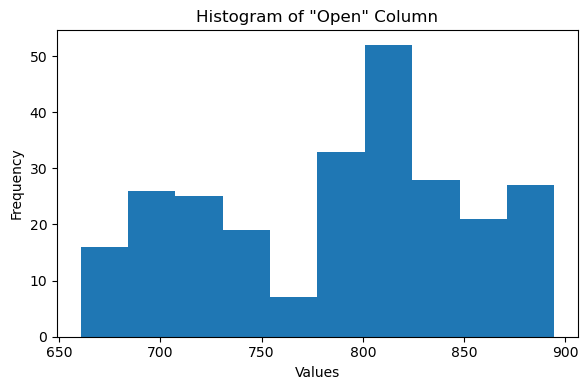

In [92]:
visualize_histogram(df, "Open")

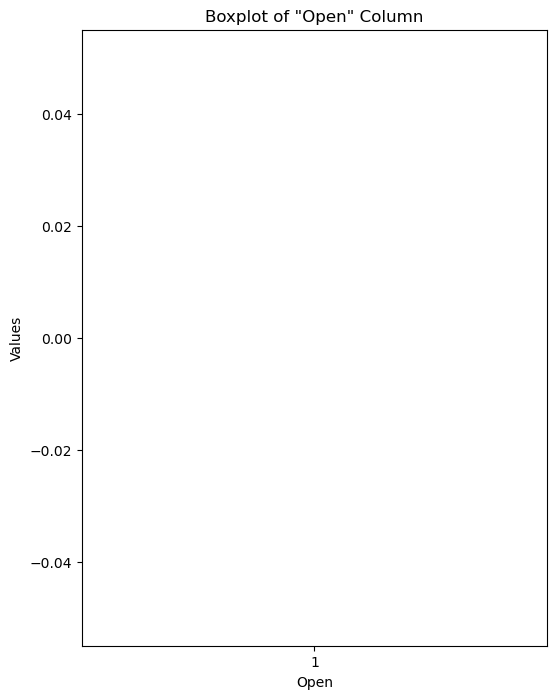

In [93]:
visualize_boxplot(df , "Open")

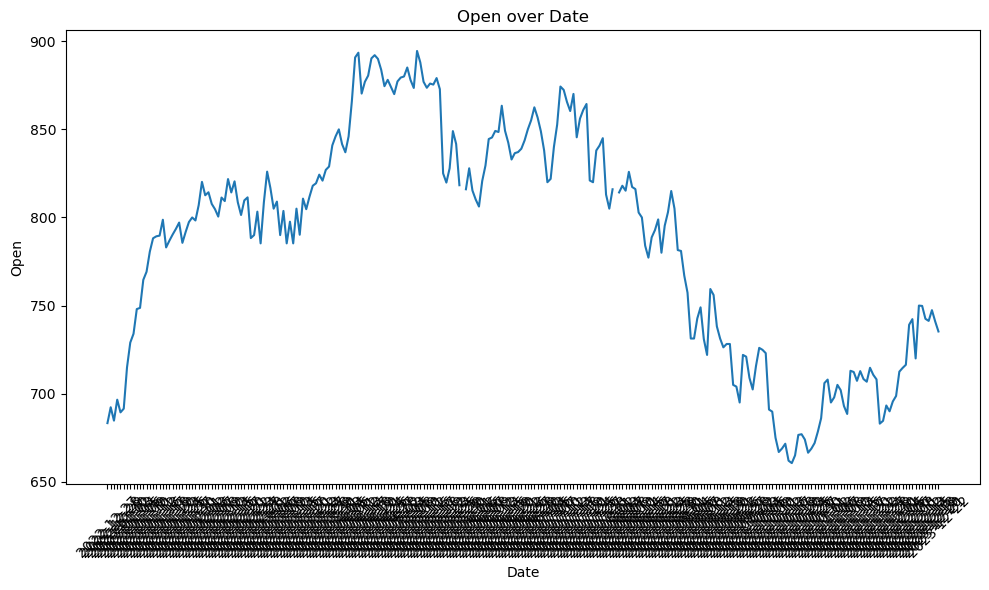

In [96]:
visualize_time_series(df , "Date" , "Open")

In [95]:
oldest_date = df['Date'].min()
newest_date = df['Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2022-12-27
Newest Date: 2023-12-22


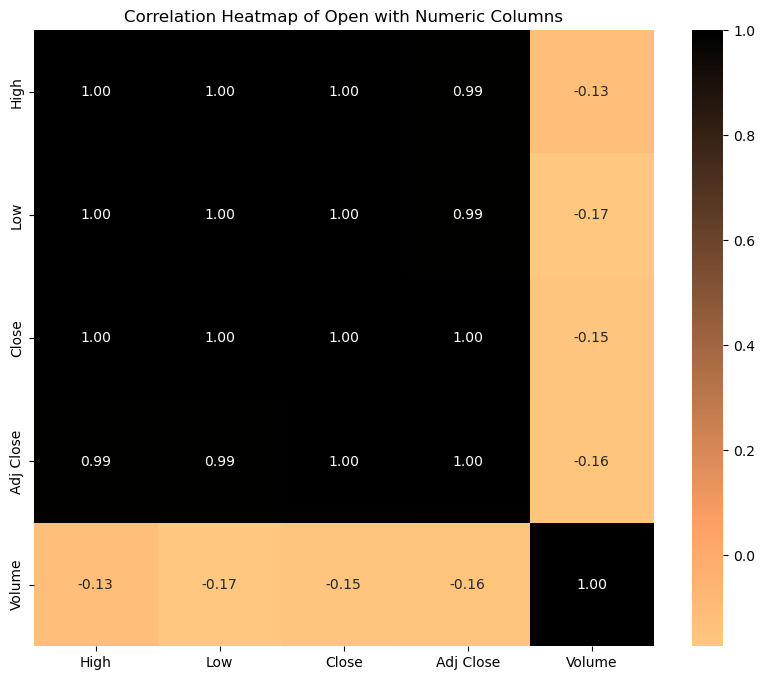

In [84]:
visualize_column_correlation(df , "Open")

In [25]:
# High

In [26]:
df["High"].describe()

count    254.000000
mean     794.562991
std       64.440245
min      669.799988
25%      737.925018
50%      809.649994
75%      845.150009
max      904.599976
Name: High, dtype: float64

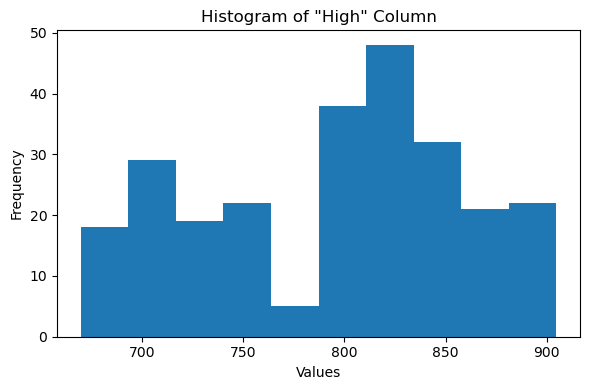

In [27]:
visualize_histogram(df, "High")

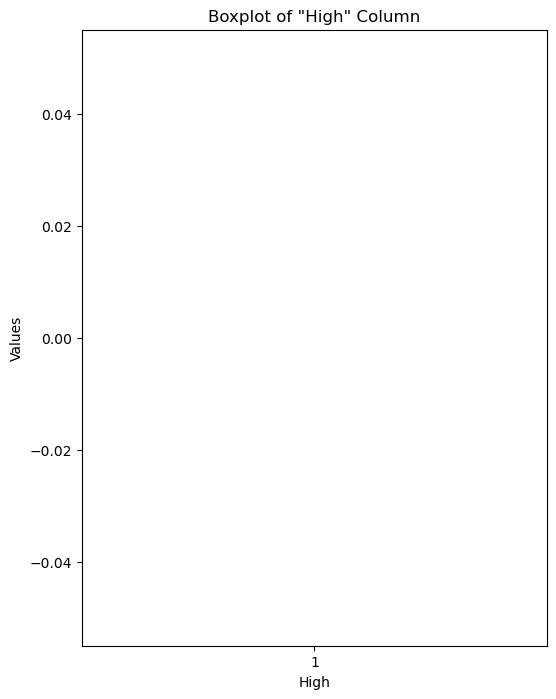

In [28]:
visualize_boxplot(df , "High")

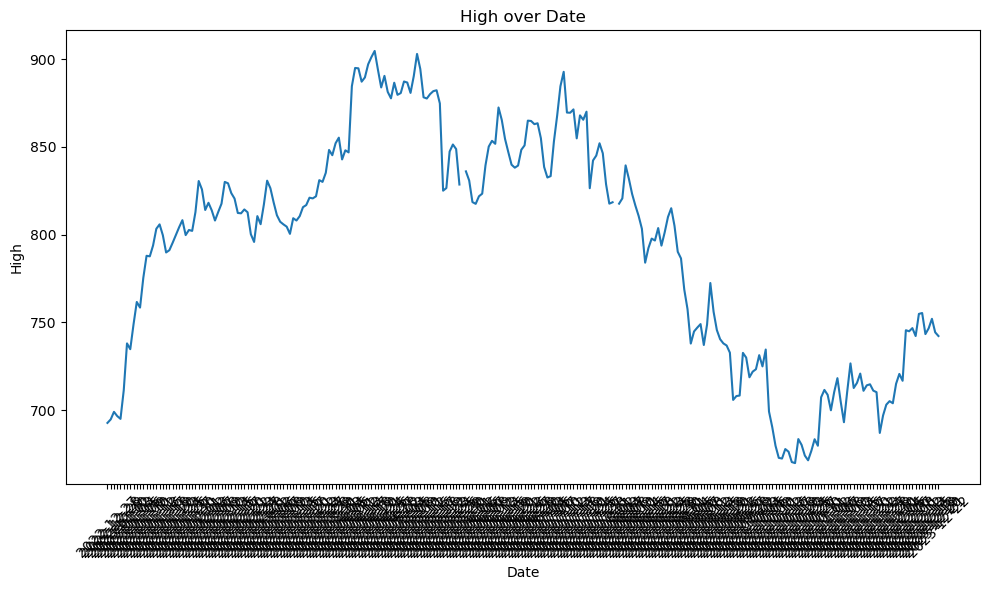

In [97]:
visualize_time_series(df , "Date" , "High")

In [98]:
oldest_date = df['Date'].min()
newest_date = df['Date'].max()

print("Oldest Date:", oldest_date)
print("Newest Date:", newest_date)

Oldest Date: 2022-12-27
Newest Date: 2023-12-22


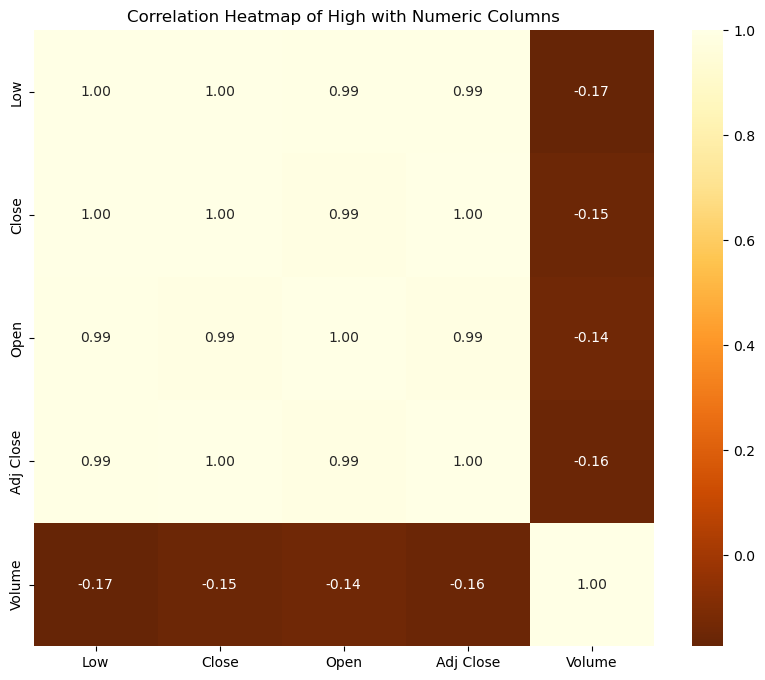

In [99]:
visualize_column_correlation(df , "High")

In [100]:
# Low

In [101]:
df["Low"].describe()

count    254.000000
mean     779.010630
std       64.310422
min      655.000000
25%      720.749985
50%      791.550018
75%      827.650024
max      891.599976
Name: Low, dtype: float64

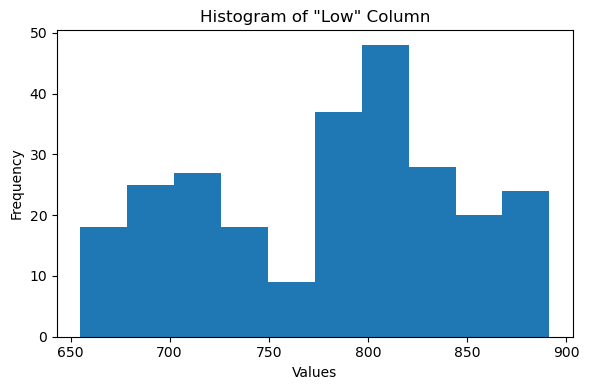

In [102]:
visualize_histogram(df, "Low")

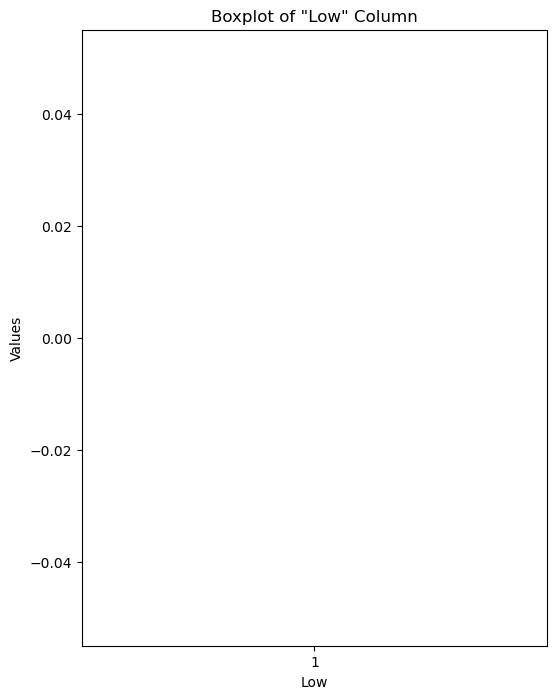

In [103]:
visualize_boxplot(df , "Low")

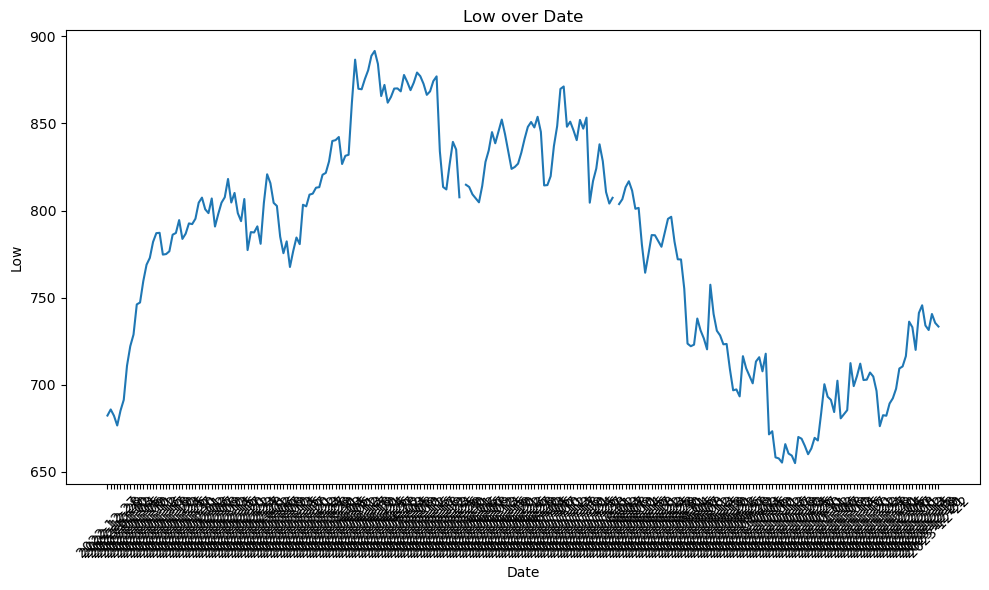

In [104]:
visualize_time_series(df , "Date" , "Low")

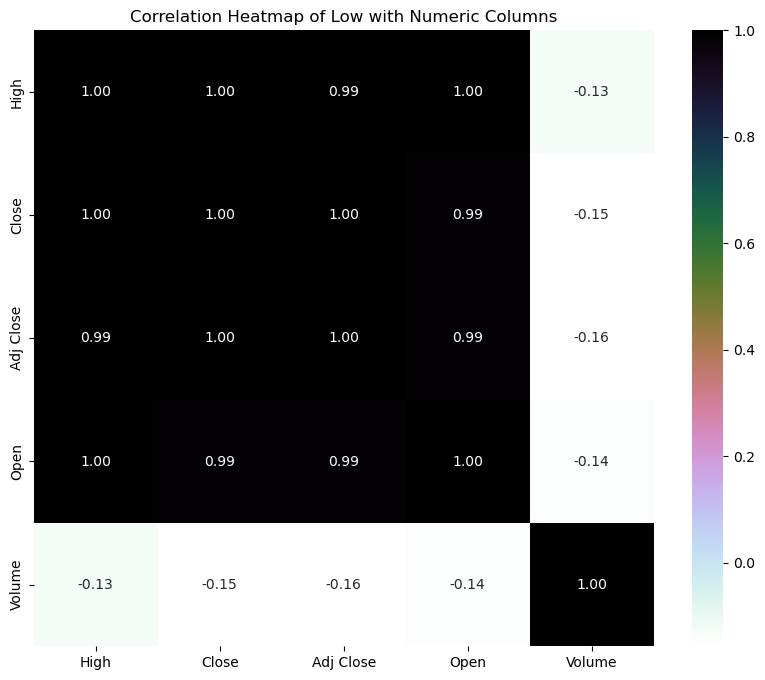

In [105]:
visualize_column_correlation(df , "Low")

In [106]:
# Close

In [107]:
df["Close"].describe()

count    254.000000
mean     787.028346
std       64.321832
min      660.599976
25%      731.699997
50%      801.800018
75%      836.449982
max      902.000000
Name: Close, dtype: float64

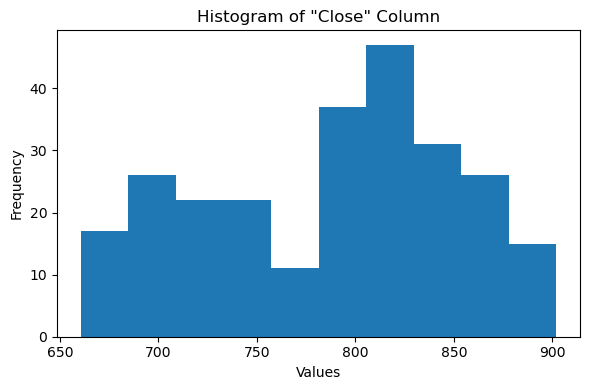

In [108]:
visualize_histogram(df, "Close")

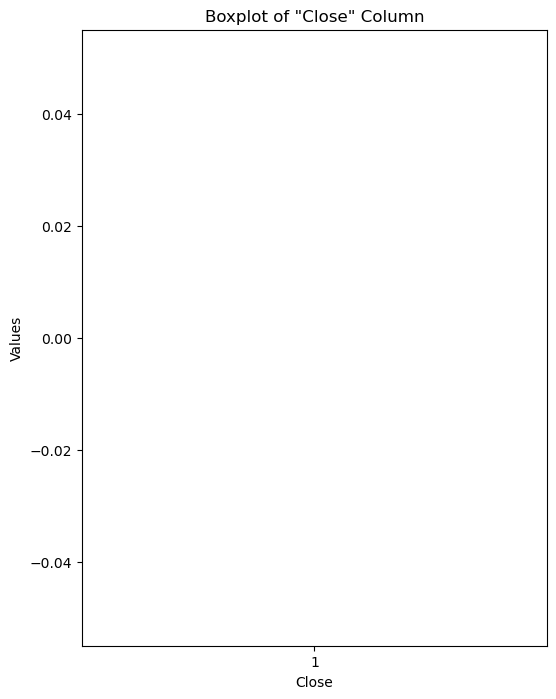

In [109]:
visualize_boxplot(df , "Close")

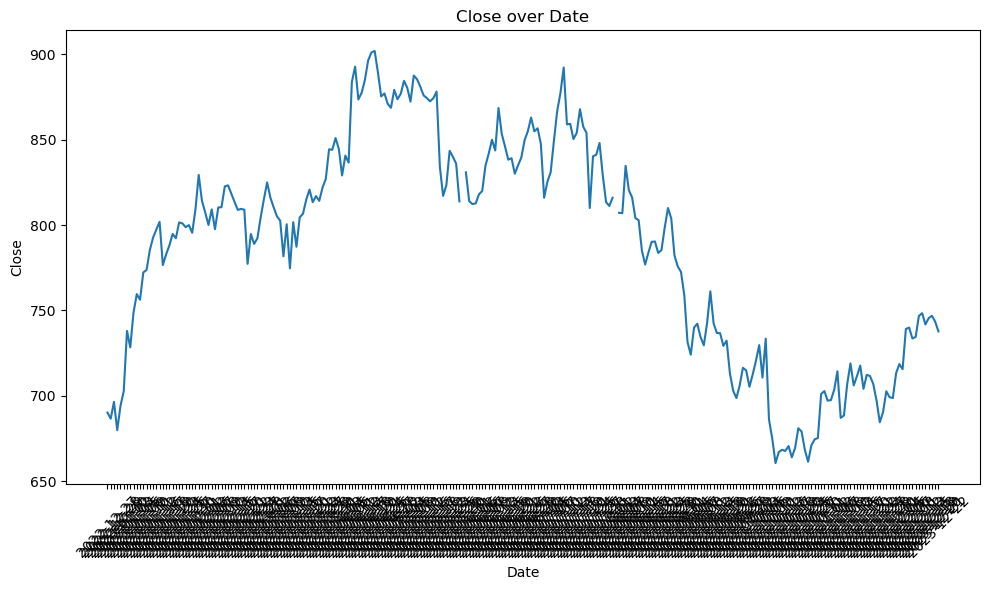

In [110]:
visualize_time_series(df , "Date" , "Close")

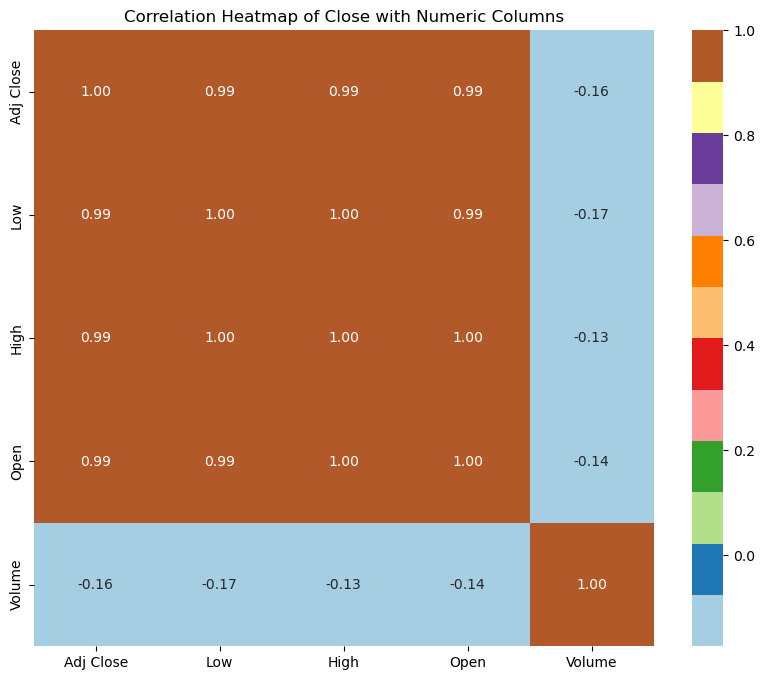

In [111]:
visualize_column_correlation(df , "Close")

In [112]:
# Adj Close

In [113]:
df["Adj Close"].describe()

count    254.000000
mean     779.157878
std       63.033885
min      655.403625
25%      725.937576
50%      789.762482
75%      828.382157
max      887.959778
Name: Adj Close, dtype: float64

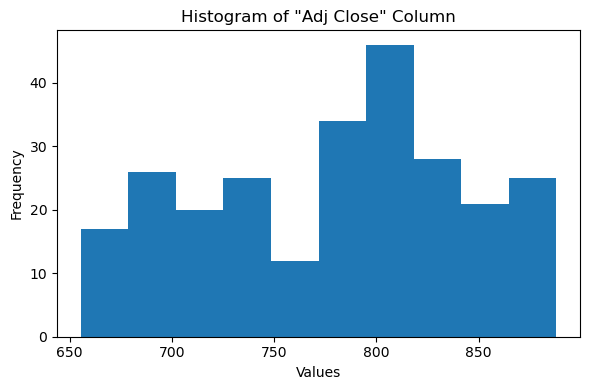

In [114]:
visualize_histogram(df, "Adj Close")

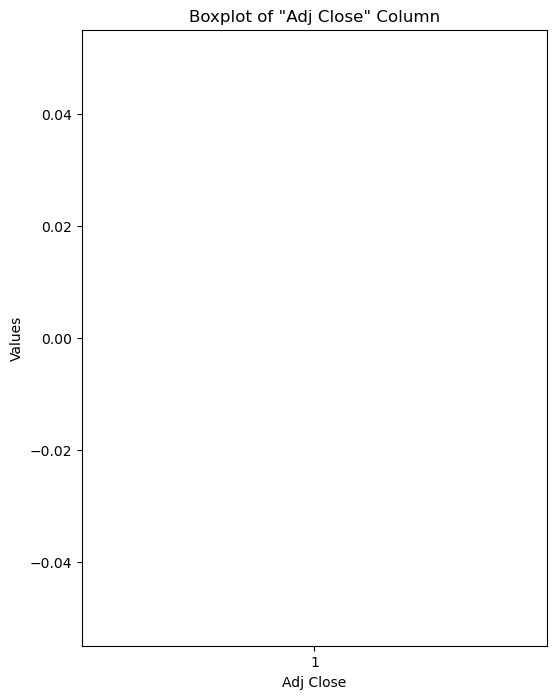

In [115]:
visualize_boxplot(df , "Adj Close")

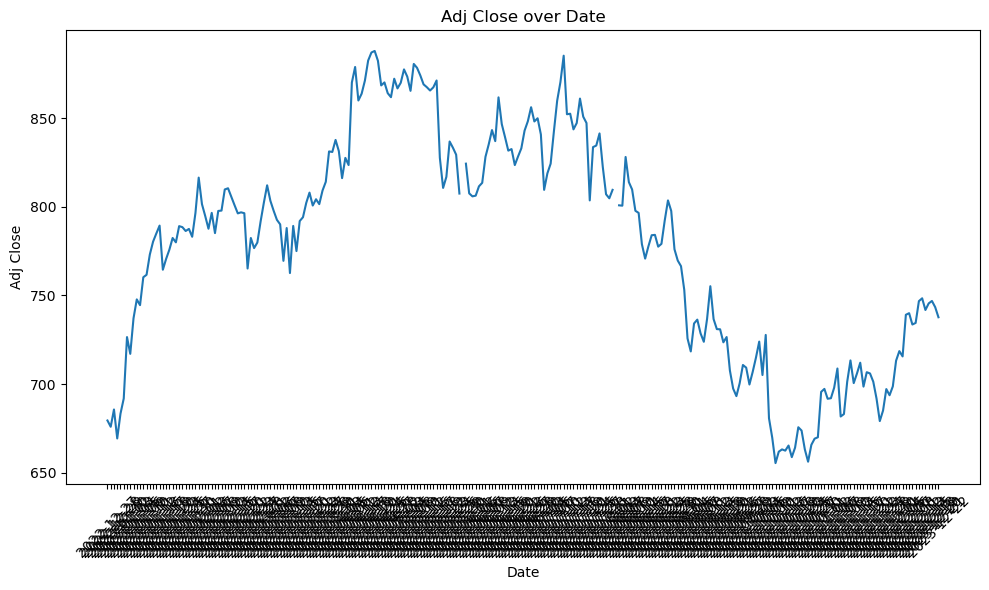

In [116]:
visualize_time_series(df , "Date" , "Adj Close")

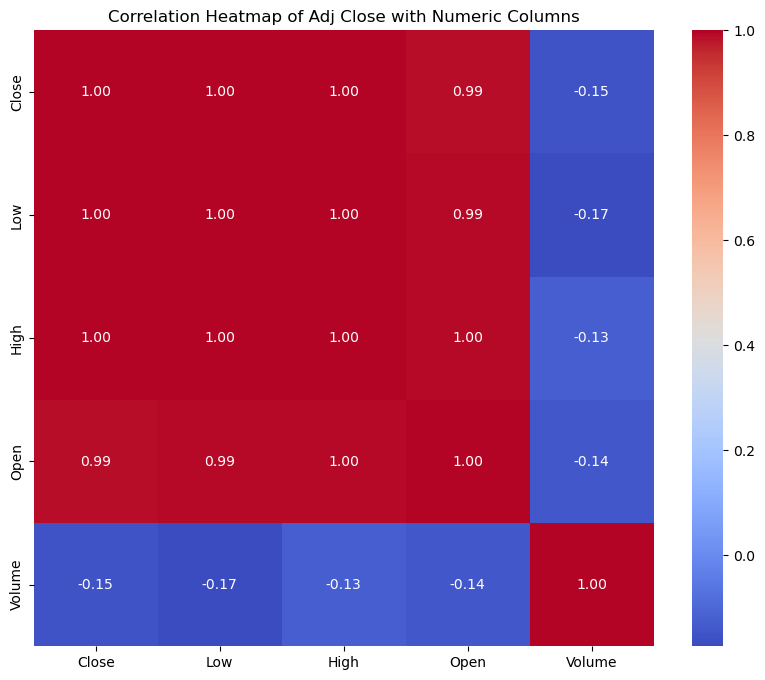

In [117]:
visualize_column_correlation(df , "Adj Close")

In [118]:
# Volume

In [119]:
df["Volume"].describe()

count    2.540000e+02
mean     3.635752e+05
std      1.622619e+05
min      1.098630e+05
25%      2.732502e+05
50%      3.238365e+05
75%      4.040958e+05
max      1.544205e+06
Name: Volume, dtype: float64

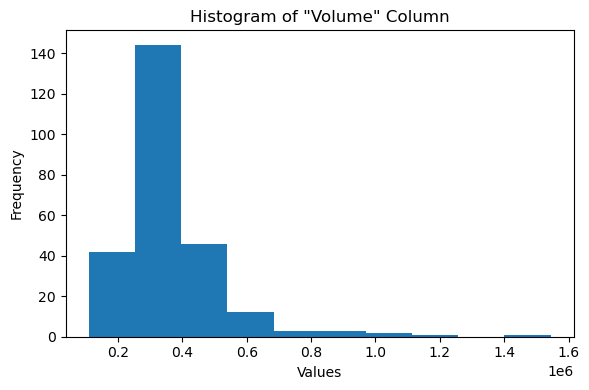

In [120]:
visualize_histogram(df, "Volume")

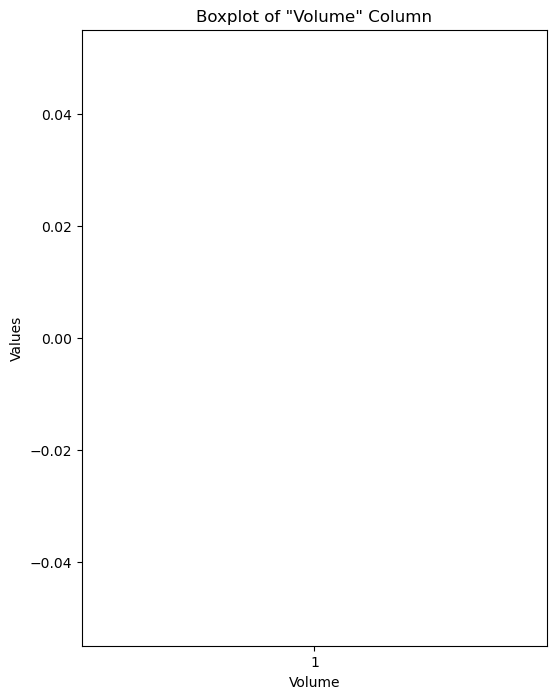

In [121]:
visualize_boxplot(df , "Volume")

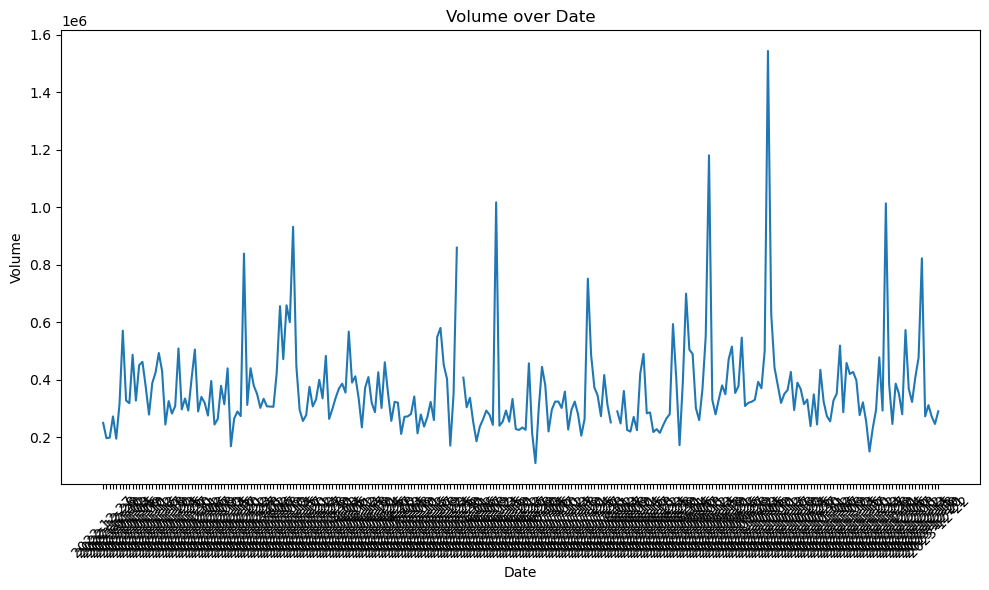

In [122]:
visualize_time_series(df , "Date" , "Volume")

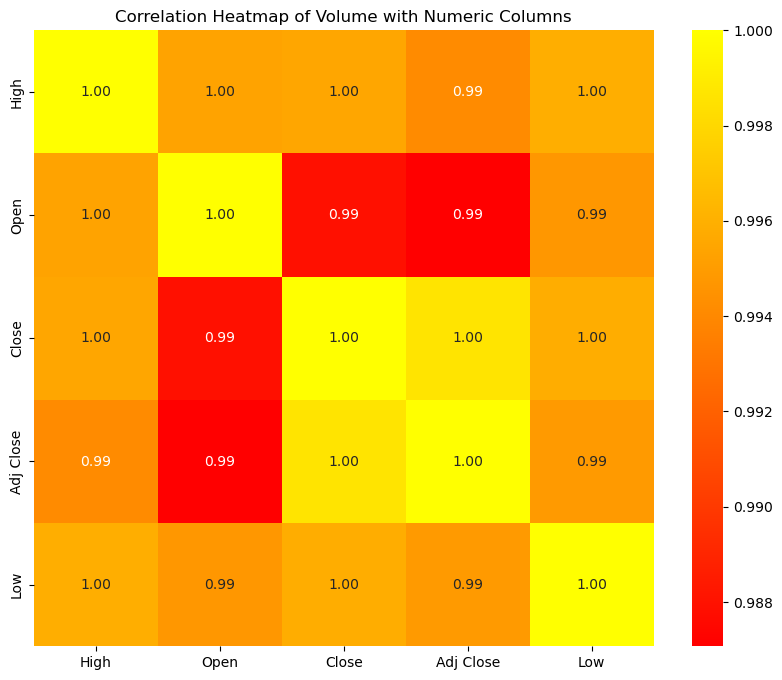

In [123]:
visualize_column_correlation(df , "Volume")

## Varience

In [124]:
def calculate_column_variance(data, column_name):
    column_variance = data[column_name].var()
    return column_variance

def calculate_column_covariance(data, column):
    numeric_columns = data.select_dtypes(include=[np.number]).columns.drop(column)
    covariances = {col: data[[column, col]].cov().iloc[0, 1] for col in numeric_columns}
    print(f"Covariance of '{column}' with other columns:")
    for col, cov in covariances.items():
        print(f"{col}: {cov:.4f}")

In [125]:
# Open

In [126]:
calculate_column_variance(df , "Open")

4162.428041521034

In [127]:
calculate_column_covariance(df , "Open")

Covariance of 'Open' with other columns:
High: 4137.9702
Low: 4127.3087
Close: 4099.7422
Adj Close: 4014.1722
Volume: -1513718.3174


In [128]:
# High

In [129]:
calculate_column_variance(df , "High")

4152.545193711787

In [130]:
calculate_column_covariance(df , "High")

Covariance of 'High' with other columns:
Open: 4137.9702
Low: 4127.0863
Close: 4126.1533
Adj Close: 4038.0292
Volume: -1326571.3628


In [131]:
# Low

In [132]:
calculate_column_variance(df , "Low")

4135.830335666019

In [133]:
calculate_column_covariance(df , "Low")

Covariance of 'Low' with other columns:
Open: 4127.3087
High: 4127.0863
Close: 4119.2395
Adj Close: 4033.0575
Volume: -1814653.0902


In [134]:
# Close

In [135]:
calculate_column_variance(df , "Close")

4137.298095058903

In [136]:
calculate_column_covariance(df , "Close")

Covariance of 'Close' with other columns:
Open: 4099.7422
High: 4126.1533
Low: 4119.2395
Adj Close: 4048.8545
Volume: -1607369.3727


In [137]:
# Adj Close

In [138]:
calculate_column_variance(df , "Adj Close")

3973.2706568476874

In [139]:
calculate_column_covariance(df , "Adj Close")

Covariance of 'Adj Close' with other columns:
Open: 4014.1722
High: 4038.0292
Low: 4033.0575
Close: 4048.8545
Volume: -1604196.8783


In [140]:
# Volume

In [141]:
calculate_column_variance(df , "Volume")

26328921387.36899

In [142]:
calculate_column_covariance(df , "Volume")

Covariance of 'Volume' with other columns:
Open: -1513718.3174
High: -1326571.3628
Low: -1814653.0902
Close: -1607369.3727
Adj Close: -1604196.8783


# Beta 

In [143]:
def calculate_beta(data):
    stock_returns = data['Close']
    market_returns = data['Open']
    beta = np.cov(market_returns, stock_returns, ddof=0)[0][1] / np.var(market_returns, ddof=0)
    return beta

In [144]:
calculate_beta(df)

nan

# Cac40 Index Hedge

In [145]:
def calculate_cac40_hedge(data):
    cac40_index = data[['Open']].mean(axis=1)
    beta = np.cov(cac40_index, data['Open'], ddof=0)[0][1] / np.var(cac40_index, ddof=0)
    return beta

In [146]:
calculate_cac40_hedge(df)

nan

# Value at Risk

## Portfolio VaR

In [147]:
def calculate_equal_weighted_portfolio_var(df, confidence_level=0.95):
    stock_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
    num_assets = 1  # As 'stock_returns' is a Series, set the number of assets to 1
    
    weights = np.array([1 / num_assets])
    portfolio_variance = np.dot(weights.T, np.dot(stock_returns.var(), weights))

    portfolio_volatility = np.sqrt(portfolio_variance)
    alpha = 1 - confidence_level
    portfolio_var = norm.ppf(alpha) * portfolio_volatility * np.sqrt(1)
    
    return portfolio_var


def calculate_single_stock_var(df, confidence_level=0.95):
    stock_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
    
    var_values = {}
    stock_variance = np.var(stock_returns)
    stock_volatility = np.sqrt(stock_variance)
    
    alpha = 1 - confidence_level
    stock_var = norm.ppf(alpha) * stock_volatility * np.sqrt(1)
        
    var_values['Close'] = stock_var  # Assign the VaR value to the 'Close' key
    
    return var_values

In [148]:
calculate_equal_weighted_portfolio_var(df)

-0.026792100018797844

## Single Stocks VaR

In [149]:
calculate_single_stock_var(df)

{'Close': -0.0267395148846536}

# HeatMap

In [150]:
def create_heatmap(data):
    numeric_data = data.select_dtypes(include=np.number)
#     plt.figure(figsize=(10000, 10000))
    sns.heatmap(numeric_data, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Heatmap of Numeric DataFrame Columns')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

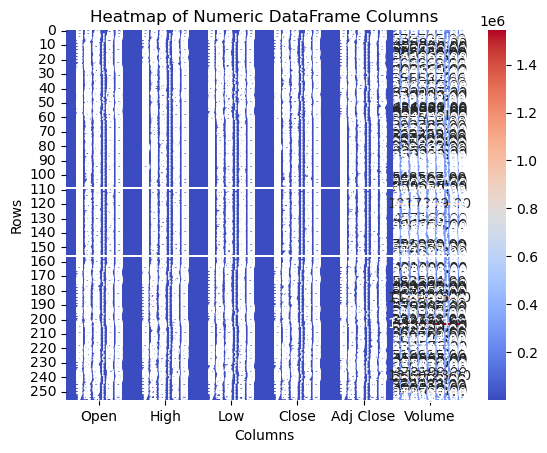

In [151]:
create_heatmap(df)